### IAPPT
Este archivo contiene la creacion y entrenamiento del modelo que usamos para determinar si la mano esta en posicion de piedra, papel o tijera.
Antes de nada ejecutaremos los imports necesarios.

In [77]:
import tensorflow as tf
import common.constants as const
import pandas as pd

# Keras 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


### Datasets
Primero hemos de entender que datos estamos pasando a nuestro modelo exactamente.
Mediante mediapie obtenemos una serie de puntos llamados landmarks, cada uno con un numero representandolo. 

![alt text](https://google.github.io/mediapipe/images/mobile/hand_landmarks.png)

Para obtener y guardar estos datos en el csv se encarga el ejecutable ```csv_generator.py```.
De todos estos landmarks solo usaremos estos: 0,6,8,10,12,14,16,18,20.

In [78]:
# A almacenamos los datos de los ficheros
data_train = pd.read_csv(const.TRAINING_CSV)
data_eval = pd.read_csv(const.EVALUATION_CSV)
data_train.sample(5)

,GESTO,WRIST_Y,WRIST_X,INDEX_FINGER_PIP_Y,INDEX_FINGER_PIP_X,INDEX_FINGER_TIP_Y,INDEX_FINGER_TIP_X,MIDDLE_FINGER_PIP_Y,MIDDLE_FINGER_PIP_X,MIDDLE_FINGER_TIP_Y,MIDDLE_FINGER_TIP_X,RING_FINGER_PIP_Y,RING_FINGER_PIP_X,RING_FINGER_TIP_Y,RING_FINGER_TIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_TIP_Y,PINKY_FINGER_TIP_X
1119,2,0.810400,0.322421,0.290655,0.516484,0.082960,0.547678,0.297433,0.348913,0.126029,0.326596,0.398122,0.280565,0.486703,0.318161,0.446142,0.224232,0.526384,0.247851
1303,2,0.770331,0.348192,0.338040,0.565809,0.154748,0.619422,0.297085,0.405533,0.089698,0.396375,0.413495,0.336537,0.518140,0.369481,0.452325,0.275689,0.550939,0.299673
474,1,0.702548,0.465708,0.328262,0.633266,0.143417,0.661807,0.300946,0.511260,0.086581,0.521036,0.318685,0.388693,0.109049,0.391177,0.382574,0.277146,0.223459,0.238025
2106,0,0.738863,0.478445,0.332639,0.621907,0.327735,0.537122,0.310579,0.437218,0.339731,0.392501,0.356337,0.332661,0.360872,0.351410,0.446549,0.252525,0.460689,0.281348
2184,0,0.730313,0.418795,0.321602,0.581689,0.433916,0.578576,0.322999,0.506320,0.417180,0.511492,0.339237,0.424299,0.416863,0.439545,0.369728,0.346795,0.435274,0.379122


Antes de usar el dataset eliminamos la columna que representa el resultado (Y) y la almacenamos en una variable.



In [ ]:
train_y = to_categorical(data_train.pop('GESTO'))
eval_y = to_categorical(data_eval.pop('GESTO'))

###  Creando el modelo
Usaremos un modelo secuencial con cuatro capas ```1 input``` (la cual se crea de manera implicita), ```2 ocultas``` y ```1 output``` con 
Los parametros son estos:

- ```20/10/3``` representa la cantidad de nodos de esta capa.

- ```input_dim``` cantidad de parametros en la entrada.

- ```activation``` una funcion de activacion es la que opera los parametros del nodo, este parametro especifica que tipo de funcion usamos.

- ```optimizer``` los optimizadores son algoritmos usados para disminuir errores del modelo.

- ```loss``` funcion utilizada para cuantificar como de bueno es el desempeño del modelo, cuanto mas cercano es a 0 mejor.

- ```metrics``` es el objetivo del modelo (precision en este caso). 

In [91]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=18))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Mostrar estructura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

Aqui es donde empieza a aprender y clasificar.
Para ello se llama con el metodo ```fit()``` con los siguientes parametros:

- ```data_train``` es el dataset con los landmarks.

- ```train_y``` contiene la columna con el dato de gesto para que el modelo compruebe si acierta o falla.

- ```batch_size``` cantidad de filas de data_train que se procesan en cada paso.

- ```epochs``` numero de repeticiones sobre el dataset completo.

In [92]:
history = model.fit(data_train, train_y, epochs=10)

Epoch 1/10
72/72 [==============================] - 0s 737us/step - loss: 1.0393 - accuracy: 0.5668
Epoch 2/10
72/72 [==============================] - 0s 901us/step - loss: 0.9571 - accuracy: 0.7311
Epoch 3/10
72/72 [==============================] - 0s 789us/step - loss: 0.8363 - accuracy: 0.8330
Epoch 4/10
72/72 [==============================] - 0s 761us/step - loss: 0.6864 - accuracy: 0.9016
Epoch 5/10
72/72 [==============================] - 0s 746us/step - loss: 0.5351 - accuracy: 0.9253
Epoch 6/10
72/72 [==============================] - 0s 873us/step - loss: 0.4041 - accuracy: 0.9552
Epoch 7/10
72/72 [==============================] - 0s 887us/step - loss: 0.3031 - accuracy: 0.9675
Epoch 8/10
72/72 [==============================] - 0s 859us/step - loss: 0.2291 - accuracy: 0.9811
Epoch 9/10
72/72 [==============================] - 0s 873us/step - loss: 0.1763 - accuracy: 0.9842
Epoch 10/10
72/72 [==============================] - 0s 803us/step - loss: 0.1398 - accuracy: 0.9886

### Desempeño del modelo durante entrenamiento

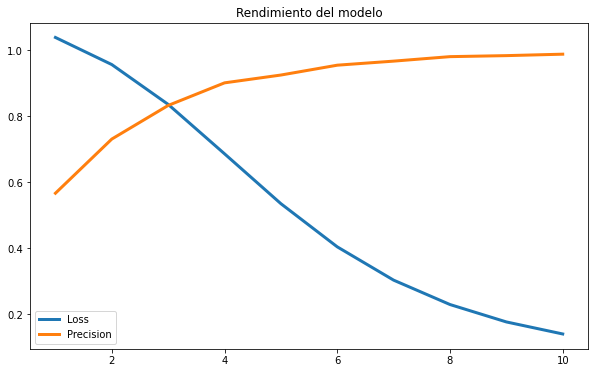

In [93]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Rendimiento del modelo')
plt.plot(np.arange(1, 11), history.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 11), history.history['accuracy'], label='Precision', lw=3)
plt.legend()

### Resultados
Para visualizar la precision del modelo mostrandole nuevos datos, ejecutamos esta celda.

In [94]:
scores = model.evaluate(data_eval, eval_y)
print(f'Precision del modelo: {scores[1]:.4f}')  

12/12 [==============================] - 0s 724us/step - loss: 0.1953 - accuracy: 0.9144
Precision del modelo: 0.9144


### Guardar el modelo
Si estamos contentos con el rendimiento lo podemos guardar de esta manera:

In [95]:
model.save('model\\gesture_classifier.h5')